In [1]:
!pip install contractions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
import seaborn as sns
import contractions
from collections import defaultdict,Counter
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.9 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('/kaggle/input/glowbytedataset/socialmedia_relevant_cols.csv',encoding = 'unicode_escape')
df.head(3)

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1


In [3]:
df.shape

(10876, 3)

In [4]:
df.drop_duplicates(inplace = True,subset = ['text'])
df.shape

(10678, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10678 entries, 0 to 10875
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         10678 non-null  object
 1   choose_one   10678 non-null  object
 2   class_label  10678 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 333.7+ KB


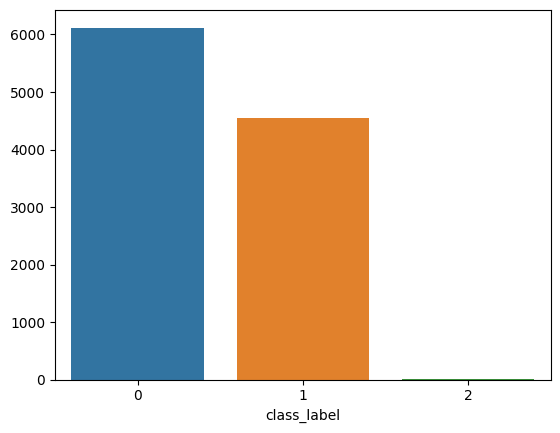

In [6]:
sns.barplot(y = df.class_label.value_counts().values,x = df.class_label.value_counts().index)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


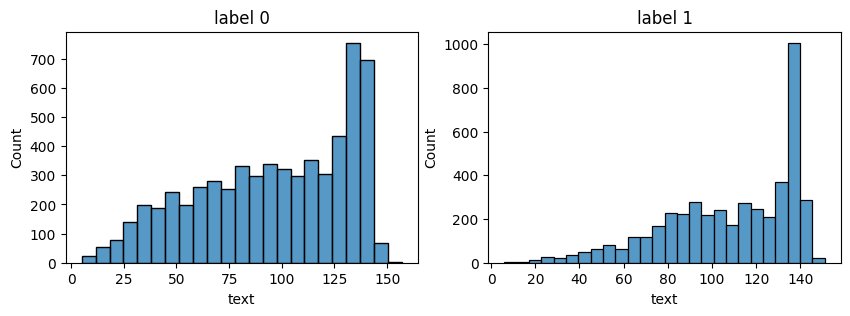

In [7]:
plt.figure(figsize = (10,3))
plt.subplot(121)
plt.title('label 0')
sns.histplot(df[df.class_label == 0]['text'].str.len())
plt.subplot(122)
plt.title('label 1')
sns.histplot(df[df.class_label == 1]['text'].str.len())
plt.show()

In [8]:
def clean_tweet(text):

    # удаляем HTML
    updated_text = re.sub(r'<.*?>',"", text)

    # раскрываем сокращения
    expanded_words = []   
    for word in updated_text.split():
        # using contractions.fix to expand the shortened words
        expanded_words.append(contractions.fix(word))  
   
    updated_text = ' '.join(expanded_words)

    # удаляем URL
    updated_text = re.sub(r'https?://(www\.)?(\w+)(\.\w+)(/\w*)?',"", updated_text)

    # удаляем идентификаторы почты
    updated_text = re.sub(r'[\w\.-]+@[\w\.-]+\.\w+',"", updated_text)

    # удаляем смайлы
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" 
                           u"\U0001F300-\U0001F5FF" 
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF" 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    updated_text = emoji_pattern.sub(r'', updated_text)

    # удаляем символы твиттера
    updated_text = re.sub(r'@\w+',"", updated_text)

    # заменяем аббревиатуры
    updated_text = re.sub(r"MH370", "Malaysia Airlines Flight 370", updated_text)
    updated_text = re.sub(r"mÌ¼sica", "music", updated_text)
    updated_text = re.sub(r"okwx", "Oklahoma City Weather", updated_text)
    updated_text = re.sub(r"arwx", "Arkansas Weather", updated_text)    
    updated_text = re.sub(r"gawx", "Georgia Weather", updated_text)  
    updated_text = re.sub(r"scwx", "South Carolina Weather", updated_text)  
    updated_text = re.sub(r"cawx", "California Weather", updated_text)
    updated_text = re.sub(r"tnwx", "Tennessee Weather", updated_text)
    updated_text = re.sub(r"azwx", "Arizona Weather", updated_text)  
    updated_text = re.sub(r"alwx", "Alabama Weather", updated_text)
    updated_text = re.sub(r"usNWSgov", "United States National Weather Service", updated_text)
    updated_text = re.sub(r"Suruc", "Sanliurfa", updated_text)
    updated_text = re.sub(r"&gt;", ">", updated_text)
    updated_text = re.sub(r"&lt;", "<", updated_text)
    updated_text = re.sub(r"&amp;", "&", updated_text)

    # удаляем юникод символы
    updated_text = updated_text.encode("ascii", "ignore").decode()

    # удаляем знаки препинания 
    punctuations = string.punctuation
    for p in punctuations:
        updated_text = re.sub(re.escape(p), " ",updated_text)

    # удаляем стоп слова
    updated_text = " ".join([word for word in str(updated_text).split() if word not in stopwords.words('english')])

    # переводи в нижний регистр
    updated_text = updated_text.lower()
    
    return updated_text

In [9]:
df['clean_text'] = df['text'].apply(clean_tweet)
df

,text,choose_one,class_label,clean_text
0,Just happened a terrible car crash,Relevant,1,just happened terrible car crash
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,our deeds reason earthquake may allah forgive us
2,"Heard about #earthquake is different cities, s...",Relevant,1,heard earthquake different cities stay safe ev...
3,"there is a forest fire at spot pond, geese are...",Relevant,1,forest fire spot pond geese fleeing across str...
4,Forest fire near La Ronge Sask. Canada,Relevant,1,forest fire near la ronge sask canada
...,...,...,...,...
10866,Suicide bomber kills 15 in Saudi security site...,Relevant,1,suicide bomber kills 15 saudi security site mo...
10868,Green Line derailment in Chicago http://t.co/U...,Relevant,1,green line derailment chicago
10869,Two giant cranes holding a bridge collapse int...,Relevant,1,two giant cranes holding bridge collapse nearb...
10873,The Latest: More Homes Razed by Northern Calif...,Relevant,1,the latest more homes razed northern californi...


In [10]:
def return_topcorpus_words_by_target(target,n,column = 'clean_text'):
    '''Возвращает топ N слова в документы отфильтрованные по выбранной метке признака class label'''
    corpus=[]
    
    for x in df[df['class_label']==target][column].str.split():
        for i in x:
            corpus.append(i)
    dic=defaultdict(int)
    for word in corpus:
        dic[word] += 1
    top = sorted(dic.items(),key = lambda x:x[1],reverse = True)[:n]
    return top

Визуализация самых популярных слов(не предобработанные) по метке признака class label

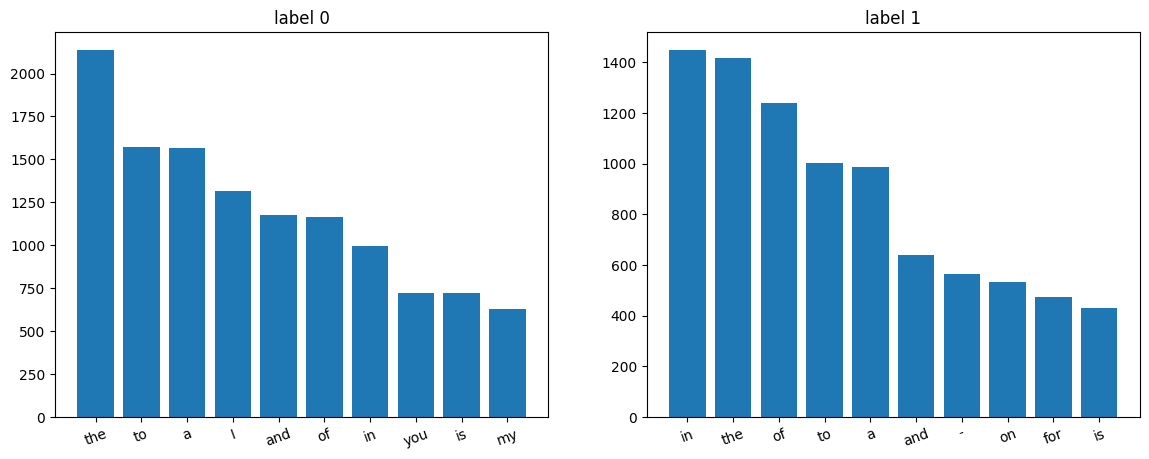

In [11]:
top_0 = return_topcorpus_words_by_target(0,10,column = 'text')
x0,y0 = zip(*top_0)
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title('label 0')
plt.bar(x0,y0)
plt.xticks(rotation=20)
top_1 = return_topcorpus_words_by_target(1,10,column = 'text')
plt.subplot(122)
plt.title('label 1')
x1,y1 = zip(*top_1)
plt.bar(x1,y1)
plt.xticks(rotation=20)
plt.show()

Визуализация самых популярных слов(очищенные) по метке признака class label

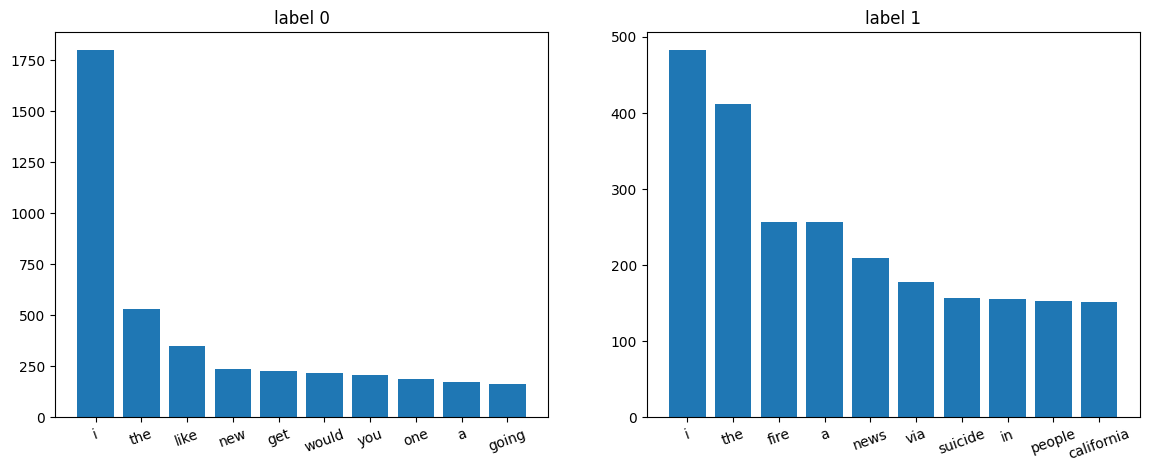

In [12]:
top_0 = return_topcorpus_words_by_target(0,10)
x0,y0 = zip(*top_0)
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.title('label 0')
plt.bar(x0,y0)
plt.xticks(rotation=20)
top_1 = return_topcorpus_words_by_target(1,10)
plt.subplot(122)
plt.title('label 1')
x1,y1 = zip(*top_1)
plt.bar(x1,y1)
plt.xticks(rotation=20)
plt.show()

## Векторизация с помощью CountVectorizer

Трансформируем текстовые документы в матрицу токенов. Подсчитывает появление каждого слова, из показателей частоты слов создается разреженная матрица, каждая строка представляет собой предложение,количество столбцов в данной матрице равна размеру словаря.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
vect = CountVectorizer()

In [14]:

corpus = vect.fit_transform(df.clean_text)
corpus = corpus.toarray()
# понижаем пространство признаков до 3 с помощью PCA
pca3d = PCA(3)
corpus3d = pca3d.fit_transform(corpus)

In [15]:
def plot_embeddings(text_corpus):
    '''3д визуализация векторизации предложений'''
    fig = plt.figure(figsize = [10,10])
    ax = fig.add_subplot(projection='3d')
    scatter = ax.scatter(text_corpus[:,0],text_corpus[:,1],text_corpus[:,2],c = df.class_label,label = df.class_label)
    legend = ax.legend(*[scatter.legend_elements()[0],['0','1','2']],)
    plt.show()

На данной визуализации можно увидеть что часть меток класса,в трехмерном пространстве довольно легко различимы

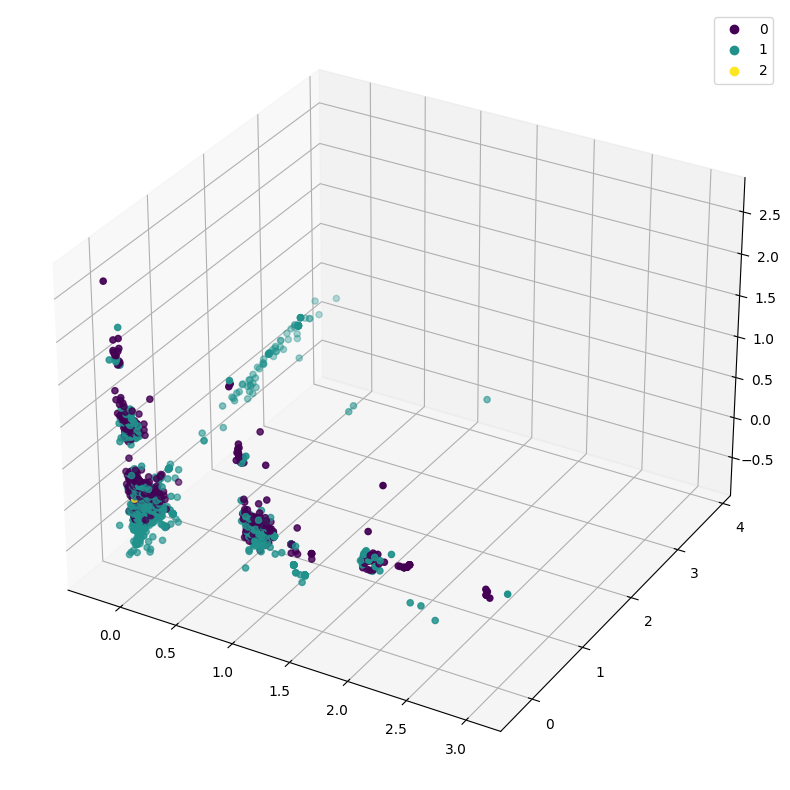

In [16]:
plot_embeddings(corpus3d)

In [17]:
from tokenizers import Tokenizer,models,trainers,pre_tokenizers,normalizers
from transformers import PreTrainedTokenizerFast
from datasets import Dataset

In [18]:
LOWERCASE = False

## Byte Pair Encoding(BPE)

Идея BPE разбить слова на наиболее общие части и представлять их полные версии как комбинации этих кусков.В словарь заданного размера добавляются токены объединением двух существующих токенов(на старте символы),которые встречаются чаще других пар в заданном документе. 

In [19]:
bpe_tokenizer = Tokenizer(models.BPE(unk_token = None))
bpe_tokenizer.normalizer = normalizers.Sequence([normalizers.NFC()] + [normalizers.Lowercase()] if False else [])
bpe_tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel()
special_tokens = ["[UNK]"]
trainer = trainers.BpeTrainer(vocab_size=100, special_tokens=special_tokens)


In [20]:
dataset = Dataset.from_pandas(df[['clean_text']])
def train_corp_iter():
    for i in range(0, len(dataset), 1000):
        yield dataset[i : i + 1000]["clean_text"]

In [21]:
bpe_tokenizer.train_from_iterator(train_corp_iter(),trainer = trainer)
tokenizer = PreTrainedTokenizerFast(
    tokenizer_object=bpe_tokenizer,
    unk_token="[UNK]",
)

In [22]:
tokenized_text = []
for text in tqdm(df['clean_text'].tolist()):
    tokenized_text.append(tokenizer.tokenize(text))

  0%|          | 0/10678 [00:00<?, ?it/s]

In [23]:
df['tokenized_text'] = tokenized_text
df.head()

,text,choose_one,class_label,clean_text,tokenized_text
0,Just happened a terrible car crash,Relevant,1,just happened terrible car crash,"[Ġ, j, u, st, Ġh, a, p, p, en, ed, Ġt, er, r, ..."
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,our deeds reason earthquake may allah forgive us,"[Ġ, ou, r, Ġd, e, ed, s, Ġre, as, on, Ġe, ar, ..."
2,"Heard about #earthquake is different cities, s...",Relevant,1,heard earthquake different cities stay safe ev...,"[Ġh, e, ar, d, Ġe, ar, t, h, q, u, a, k, e, Ġd..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,forest fire spot pond geese fleeing across str...,"[Ġf, o, re, st, Ġf, i, re, Ġs, p, ot, Ġp, on, ..."
4,Forest fire near La Ronge Sask. Canada,Relevant,1,forest fire near la ronge sask canada,"[Ġf, o, re, st, Ġf, i, re, Ġn, e, ar, Ġl, a, Ġ..."


## Bert Embeddings

Используем предобученную модель Bert. На входе помимо токенов слов,используются Segment Embeddings(по сути это закодированный номер предложения),с помощью чего модель понимает где заканачивается одно предложение и начинается другое. Position Embeddings кодирует информацию о позиции в предложении токена. Сумма Token,Segment,Position embeddings формируют вхождение в Encoder Layer и это одна из основных причин эффективности данной модели.

In [24]:
import transformers
import torch
from sklearn.manifold import TSNE

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [26]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = transformers.BertModel.from_pretrained('bert-base-uncased').to(device)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [27]:
def encode_tweet(df):
    input_ids = []

    for x in df:
        encoded_x = tokenizer.encode(
            x,
            add_special_tokens = True
        )
        input_ids.append(encoded_x)
    return input_ids

In [28]:
train_input = encode_tweet(df['clean_text'])

In [29]:
bert_emb = []
for token in tqdm(train_input):
    t_tensor = torch.tensor(token)
    out = model_bert(t_tensor.unsqueeze(dim=0).to(device))
    bert_emb.append(out[0].mean(1).detach().cpu().numpy())

  0%|          | 0/10678 [00:00<?, ?it/s]

In [30]:
bert_embeddings = np.concatenate(bert_emb)
bert_embeddings = pca3d.fit_transform(bert_embeddings)

Визуализация Bert Embeddings. Метки признака Class label достаточно различим.

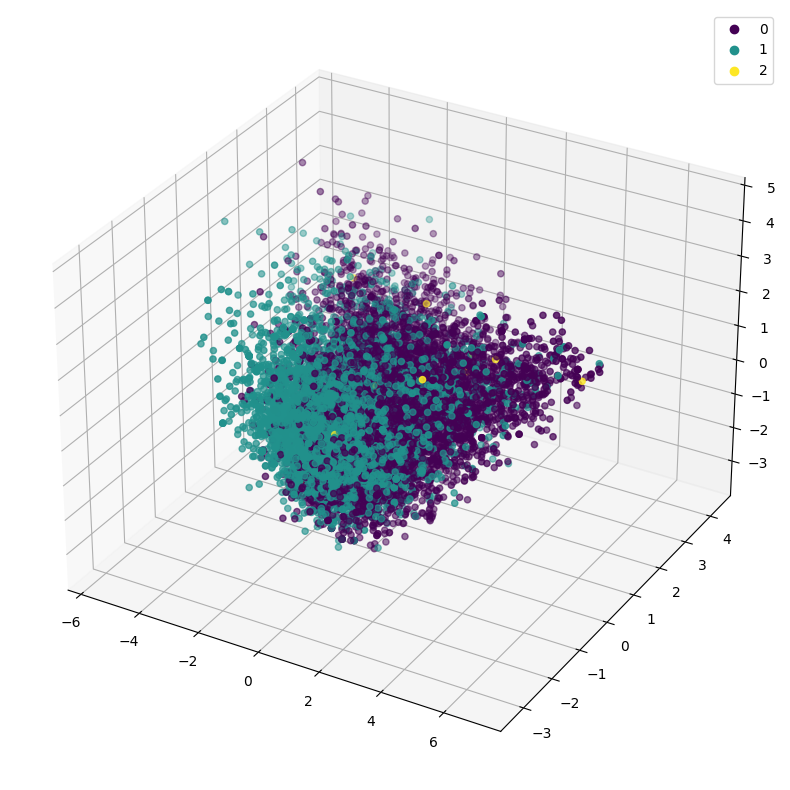

In [31]:
plot_embeddings(bert_embeddings)

## Word2Vec Embeddings

Word2Vec использутеся нейронные сети для обучения векторных представлений слов. Существуют CBOW(предсказывает слово на основе контекста),Skip-gram(использует слово для предсказания окружающих его слов)

In [32]:
from gensim.models import Word2Vec

In [33]:
df['clean_text_words'] = df['clean_text'].str.split(" ")

In [34]:
model = Word2Vec(df['clean_text_words'].tolist(),vector_size = 100,window = 5,min_count = 1,workers = 2)
model.train(df['clean_text_words'].tolist(),total_examples = model.corpus_count,epochs = 20)

(2072625, 2126400)

In [35]:
vector = model.wv[df['clean_text_words'].tolist()[0]]

In [36]:
w2vec_list = []
for sentence in tqdm(df['clean_text_words'].tolist()):
    vector = model.wv[sentence]
    w2vec_list.append(vector.mean(0))

  0%|          | 0/10678 [00:00<?, ?it/s]

In [37]:
w2vec_array = np.stack(w2vec_list)
w2vec_array = pca3d.fit_transform(w2vec_array)

Визуализация Word2Vec так же показывает метки признака class label, хорошо различимы 

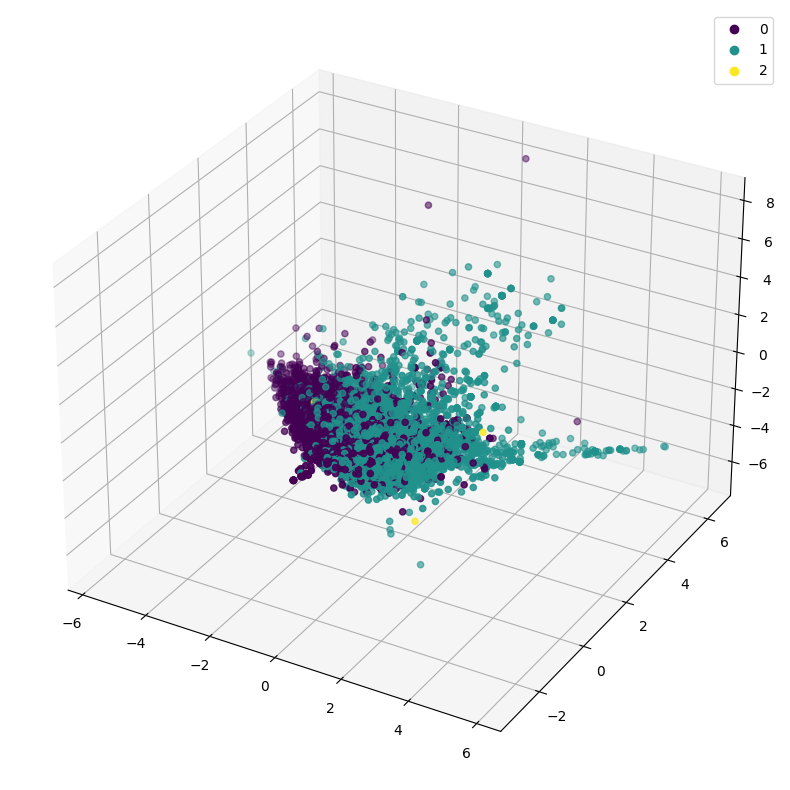

In [38]:
plot_embeddings(w2vec_array)

## Вывод

Визуализируя предложения в пониженном пространстве, можно сказать, что если бы решалась задачи классификации, то данная задача решалась бы с хорошей точностью. Так же можно создать пайплайн, которые лучше предобрабатывает данные, например решить проблему с циферными значениями,решить проблему с неопределенным классом(class label:2) и т.д.